## Step 1:
Create new project folder and Python file - UCDPA_JulieLanigan<br>
Import required libraries, pandas/seaborn/Numpy/Matplotlib

In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# Section 2: Importing data

## Step 2:
**Importing:** <br> Download .csv files to Data folder within project file<br>
Import files to project using pandas

In [3]:
aaplData = pd.read_csv('Data/AAPL.csv', engine='python')

In [4]:
amazonData = pd.read_csv('Data/Amazon.csv', engine='python')

## Step 3:
**API:** <br> Import data from an online API<br>
Data used is Quarterly Market Information Indices from data.gov.ie<br>
The requests.get(api_path).text pulls the data from the API we used.<br>
The json.loads() function then parses the data into a JSON format.

In [5]:
import requests
import json 
res = requests.get('https://api.usmart.io/org/ae1d5c14-c392-4c3f-9705-537427eeb413/3d37b27e-df36-45dc-b4b7-706847b4b4ef/1/urql')
response = json.loads(res.text)

In [6]:
data = res.text

In [7]:
json.loads(data)

[{'PRICE / MORTGAGE INTEREST RATES / EARNINGS / COST INDICES - Quarterly': '',
  '': '',
  'usmart_id': 'AWGu3xVuQhKRCdiEZ5de'},
 {'PRICE / MORTGAGE INTEREST RATES / EARNINGS / COST INDICES - Quarterly': '1990Q2',
  '': '98.3',
  'usmart_id': 'AWGu3xVuQhKRCdiEZ5dg'},
 {'PRICE / MORTGAGE INTEREST RATES / EARNINGS / COST INDICES - Quarterly': '1990Q3',
  '': '',
  'usmart_id': 'AWGu3xVuQhKRCdiEZ5dh'},
 {'PRICE / MORTGAGE INTEREST RATES / EARNINGS / COST INDICES - Quarterly': '1990Q4',
  '': '',
  'usmart_id': 'AWGu3xVuQhKRCdiEZ5di'},
 {'PRICE / MORTGAGE INTEREST RATES / EARNINGS / COST INDICES - Quarterly': '1991Q1',
  '': '',
  'usmart_id': 'AWGu3xVuQhKRCdiEZ5dj'},
 {'PRICE / MORTGAGE INTEREST RATES / EARNINGS / COST INDICES - Quarterly': '1991Q2',
  '': '101.4',
  'usmart_id': 'AWGu3xVuQhKRCdiEZ5dk'},
 {'PRICE / MORTGAGE INTEREST RATES / EARNINGS / COST INDICES - Quarterly': '1991Q3',
  '': '',
  'usmart_id': 'AWGu3xVuQhKRCdiEZ5dl'},
 {'PRICE / MORTGAGE INTEREST RATES / EARNINGS / COST

# Section 3: Analysing data

## Step 4:
**Analysing:** <br> The below functions are used to investigate the datasets<br>
First to look at the aaplData dataset<br>
the .head function returns the first 5 rows of the dataset<br>
the .tail function returns the last 5 rows<br>
The.info function shows the datatypes of each column<br>
The .describe shows statistics relating to each column

In [8]:
aaplData.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [9]:
aaplData.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [10]:
aaplData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [11]:
aaplData.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


## Step 5:
Below the same functions are to investigate the other dataset amazonData

In [12]:
amazonData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [13]:
amazonData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5837,2020-07-27,3062.00000,3098.000000,3015.77002,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.27002,3077.090088,2995.76001,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.98999,3039.159912,2996.77002,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.00000,3092.000000,3005.00000,3051.879883,3051.879883,6128300
5841,2020-07-31,3244.00000,3246.820068,3151.00000,3164.679932,3164.679932,8085500


In [14]:
amazonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5842 non-null   object 
 1   Open       5842 non-null   float64
 2   High       5842 non-null   float64
 3   Low        5842 non-null   float64
 4   Close      5842 non-null   float64
 5   Adj Close  5842 non-null   float64
 6   Volume     5842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 319.6+ KB


In [15]:
amazonData.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5842.000000,5842.000000,5842.000000,5842.000000,5842.000000,5.842000e+03
mean,372.707174,376.921392,368.114569,372.746660,372.746660,7.519048e+06
std,585.571802,591.766458,578.660700,585.607655,585.607655,7.282683e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.955001,38.547501,37.207500,37.927499,37.927499,3.684900e+06
50%,83.428749,84.945000,81.656250,83.459999,83.459999,5.657200e+06
75%,359.729988,363.439987,356.280006,360.047501,360.047501,8.533400e+06
max,3251.060059,3344.290039,3151.000000,3200.000000,3200.000000,1.043292e+08


## Step 6:
**Cleaning:** <br> In order to clean the datasets, first the unnecessary columns are dropped<br>
The columns kept (date, open, high, low, close, adjusted close) are shared by both datasets and can then be used to compare the datasets later using charts

In [16]:
aaplData=aaplData[['date','open','high','low','close','adjClose']]

In [17]:
aaplData.head()

,date,open,high,low,close,adjClose
0,2015-05-27 00:00:00+00:00,130.34,132.260,130.05,132.045,121.682558
1,2015-05-28 00:00:00+00:00,131.86,131.950,131.10,131.780,121.438354
2,2015-05-29 00:00:00+00:00,131.23,131.450,129.90,130.280,120.056069
3,2015-06-01 00:00:00+00:00,131.20,131.390,130.05,130.535,120.291057
4,2015-06-02 00:00:00+00:00,129.86,130.655,129.32,129.960,119.761181


In [18]:
amazonData=amazonData[['Date','Open','High','Low','Close','Adj Close']]

In [19]:
amazonData.head()

,Date,Open,High,Low,Close,Adj Close
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083


The .head and .info functions show that the Apple dataset has results 15/05/1997 to 22/05/2020 whereas the Amazon dataset has results from 27/05/2015 to 31/07/2020 <br>
The below code removes all rows in both datasets before 01/01/2016 and 22/05/2020 <br>
This will ensure that there is data in both datasets for the selected period

In [20]:
amazonData = amazonData[amazonData.Date >= '2016-01-01']

In [21]:
amazonData = amazonData[amazonData.Date < '2020-05-22']

In [22]:
aaplData = aaplData[aaplData.date >= '2016-01-01']

In [23]:
aaplData = aaplData[aaplData.date < '2020-05-22']

## Step 7:
the date column in the Apple dataset contains hours/mins/secs which aren't needed when comparing dates<br>
The .to_datetime function below is used to remove this and display the date column as yyyy-mm-dd as with the Amazon dataset

In [24]:
aaplData['date'] = pd.to_datetime(aaplData['date']).dt.date

In [25]:
aaplData.head()

,date,open,high,low,close,adjClose
153,2016-01-04,102.61,105.368,102.00,105.35,97.940352
154,2016-01-05,105.75,105.850,102.41,102.71,95.486033
155,2016-01-06,100.56,102.370,99.87,100.70,93.617403
156,2016-01-07,98.68,100.130,96.43,96.45,89.666321
157,2016-01-08,98.55,99.110,96.76,96.96,90.140451


In [26]:
amazonData['Date'] = pd.to_datetime(amazonData['Date']).dt.date

## Step 8:
The below code is used to rename the columns in the Apple dataset<br>
These have been renamed to be consistent with the Amazon dataset it will be compared with

In [27]:
aaplData = aaplData.rename(columns={'date': 'Date', 'open': 'Open', 'high':'High', 'low': 'Low', 'close': 'Close', 'adjClose': 'Adj Close'})

In [28]:
aaplData.head()

,Date,Open,High,Low,Close,Adj Close
153,2016-01-04,102.61,105.368,102.00,105.35,97.940352
154,2016-01-05,105.75,105.850,102.41,102.71,95.486033
155,2016-01-06,100.56,102.370,99.87,100.70,93.617403
156,2016-01-07,98.68,100.130,96.43,96.45,89.666321
157,2016-01-08,98.55,99.110,96.76,96.96,90.140451


**Rounding values** <br>
The columns in the chosen dataframes use a high number of decimal places <br>
The code below is used to round the numbers within the dataframes to 2 decimal places

In [29]:
amazonData = amazonData.round(decimals = 2)

In [30]:
aaplData = aaplData.round(decimals = 2)

## Step 9:
**Sorting/Indexing:** <br> The columns in the datafile were already sorted by date<br>
The below is an example of how the datasets could be sorted by date if the .csv file used was not sorted correctly/had rows in the incorrect order

In [31]:
aaplData.sort_values(by=['Date'])

,Date,Open,High,Low,Close,Adj Close
153,2016-01-04,102.61,105.37,102.00,105.35,97.94
154,2016-01-05,105.75,105.85,102.41,102.71,95.49
155,2016-01-06,100.56,102.37,99.87,100.70,93.62
156,2016-01-07,98.68,100.13,96.43,96.45,89.67
157,2016-01-08,98.55,99.11,96.76,96.96,90.14
...,...,...,...,...,...,...
1252,2020-05-15,300.35,307.90,300.21,307.71,307.71
1253,2020-05-18,313.17,316.50,310.32,314.96,314.96
1254,2020-05-19,315.03,318.52,313.01,313.14,313.14
1255,2020-05-20,316.68,319.52,316.20,319.23,319.23


In [32]:
amazonData.sort_values(by=['Date'])

,Date,Open,High,Low,Close,Adj Close
4689,2016-01-04,656.29,657.72,627.51,636.99,636.99
4690,2016-01-05,646.86,646.91,627.65,633.79,633.79
4691,2016-01-06,622.00,639.79,620.31,632.65,632.65
4692,2016-01-07,621.80,630.00,605.21,607.94,607.94
4693,2016-01-08,619.66,624.14,606.00,607.05,607.05
...,...,...,...,...,...,...
5788,2020-05-15,2368.52,2411.00,2356.37,2409.78,2409.78
5789,2020-05-18,2404.35,2433.00,2384.01,2426.26,2426.26
5790,2020-05-19,2429.83,2485.00,2428.97,2449.33,2449.33
5791,2020-05-20,2477.87,2500.01,2467.27,2497.94,2497.94


## Step 10:
**Missing values:** <br> below the isnull function is used to check if any of the columns have null values<br>
In this case there weren't any<br><br>
If there were a large number of null values in a column the entire column could be dropped as below<br>
*aaplData=aaplData.drop(columns=['Open'])*<br><br>
If there were a small number of null values we could choose to remove the rows with null values as below <br>
*aaplData=aaplData.dropna()*

In [33]:
aaplData.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [34]:
amazonData.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

## Step 11:
**Checking for duplicates:** <br>
The below code is used to check if there are any duplicated rows within the datasets <br>
The print function then gives an index of any duplicated rows which can be removed <br>

In [35]:
appleDuplicate = aaplData[aaplData.duplicated()]
  
print(appleDuplicate)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close]
Index: []


In [36]:
amazonDuplicate = amazonData[amazonData.duplicated()]
  
print(appleDuplicate)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close]
Index: []


## Step 12:
**Grouping:** <br>
The below code can be used to group the data by a specified column <br>
The .first function then prints the first entry in each group<br>
In this case the date column has unique values so grouping is not needed

In [37]:
groupApple = aaplData.groupby('Date')
groupApple.first()

,Open,High,Low,Close,Adj Close
Date,,,,,
2016-01-04,102.61,105.37,102.00,105.35,97.94
2016-01-05,105.75,105.85,102.41,102.71,95.49
2016-01-06,100.56,102.37,99.87,100.70,93.62
2016-01-07,98.68,100.13,96.43,96.45,89.67
2016-01-08,98.55,99.11,96.76,96.96,90.14
...,...,...,...,...,...
2020-05-15,300.35,307.90,300.21,307.71,307.71
2020-05-18,313.17,316.50,310.32,314.96,314.96
2020-05-19,315.03,318.52,313.01,313.14,313.14


In [38]:
groupAmazon = amazonData.groupby('Date')
groupAmazon.first()

,Open,High,Low,Close,Adj Close
Date,,,,,
2016-01-04,656.29,657.72,627.51,636.99,636.99
2016-01-05,646.86,646.91,627.65,633.79,633.79
2016-01-06,622.00,639.79,620.31,632.65,632.65
2016-01-07,621.80,630.00,605.21,607.94,607.94
2016-01-08,619.66,624.14,606.00,607.05,607.05
...,...,...,...,...,...
2020-05-15,2368.52,2411.00,2356.37,2409.78,2409.78
2020-05-18,2404.35,2433.00,2384.01,2426.26,2426.26
2020-05-19,2429.83,2485.00,2428.97,2449.33,2449.33


## Step 13:
**Merging dataframes:** <br>
The below code creates a new column in each dataset to note which stock the row relates to<br>
The dataframes are then merged into one dataframe (stockData) using the concatenate function to stack one on top of the other

In [39]:
aaplData['Stock'] = "Apple"

In [40]:
amazonData['Stock'] = "Amazon"

In [41]:
stockData = pd.concat([aaplData, amazonData], axis=0)

In [42]:
stockData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 153 to 5792
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2208 non-null   object 
 1   Open       2208 non-null   float64
 2   High       2208 non-null   float64
 3   Low        2208 non-null   float64
 4   Close      2208 non-null   float64
 5   Adj Close  2208 non-null   float64
 6   Stock      2208 non-null   object 
dtypes: float64(5), object(2)
memory usage: 138.0+ KB


## Step 14:
**Looping/iterrows:** <br>
The below code is an example of a for loop <br>
This for loop looks at the merged dataframe we created (stockData) and  gives a tuple of the column name and series for each column in the dataframe

In [43]:
for (columnName, columnData) in stockData.iteritems():
    print('Column Name : ', columnName)
    print('Column Contents : ', columnData.values)

Column Name :  Date
Column Contents :  [datetime.date(2016, 1, 4) datetime.date(2016, 1, 5)
 datetime.date(2016, 1, 6) ... datetime.date(2020, 5, 19)
 datetime.date(2020, 5, 20) datetime.date(2020, 5, 21)]
Column Name :  Open
Column Contents :  [ 102.61  105.75  100.56 ... 2429.83 2477.87 2500.  ]
Column Name :  High
Column Contents :  [ 105.37  105.85  102.37 ... 2485.   2500.01 2525.45]
Column Name :  Low
Column Contents :  [ 102.    102.41   99.87 ... 2428.97 2467.27 2442.54]
Column Name :  Close
Column Contents :  [ 105.35  102.71  100.7  ... 2449.33 2497.94 2446.74]
Column Name :  Adj Close
Column Contents :  [  97.94   95.49   93.62 ... 2449.33 2497.94 2446.74]
Column Name :  Stock
Column Contents :  ['Apple' 'Apple' 'Apple' ... 'Amazon' 'Amazon' 'Amazon']


# Section 4: Python

## Step 15:
**Numpy:** <br>
NumPy is a Python library used for working with arrays<br>
The code below uses Numpy to create an array called stockArray from the chosen elements of our dataframe <br>
In the below case the new array is made up of the data from the Open, High and Low columns of the dataframe <br>
The .shape function is then used to view the shape of the array <br>
the .max function for example can be used to display the largest result in each of the array columns

In [44]:
stockArray = stockData[["Open", "High", "Low"]].to_numpy()

In [45]:
print(stockArray.shape)

(2208, 3)


In [46]:
np.max(stockArray, axis = 0)

array([2500.  , 2525.45, 2467.27])

## Step 16:
**Lists:** <br>
A list is a dynamic type of data structure <br>
At times it may be easier to work with our data in a list structure rather than a dataframe or array <br>
The below code gives an example of how we can convert our dataframe to a new list, declared as stockList <br>
We could use the append() or remove() functions to add or remove items from the list if needed.

In [47]:
stockList = stockData.values.tolist()

In [48]:
print(stockList)

[[datetime.date(2016, 1, 4), 102.61, 105.37, 102.0, 105.35, 97.94, 'Apple'], [datetime.date(2016, 1, 5), 105.75, 105.85, 102.41, 102.71, 95.49, 'Apple'], [datetime.date(2016, 1, 6), 100.56, 102.37, 99.87, 100.7, 93.62, 'Apple'], [datetime.date(2016, 1, 7), 98.68, 100.13, 96.43, 96.45, 89.67, 'Apple'], [datetime.date(2016, 1, 8), 98.55, 99.11, 96.76, 96.96, 90.14, 'Apple'], [datetime.date(2016, 1, 11), 98.97, 99.06, 97.34, 98.53, 91.6, 'Apple'], [datetime.date(2016, 1, 12), 100.55, 100.69, 98.84, 99.96, 92.93, 'Apple'], [datetime.date(2016, 1, 13), 100.32, 101.19, 97.3, 97.39, 90.54, 'Apple'], [datetime.date(2016, 1, 14), 97.96, 100.48, 95.74, 99.52, 92.52, 'Apple'], [datetime.date(2016, 1, 15), 96.2, 97.71, 95.36, 97.13, 90.3, 'Apple'], [datetime.date(2016, 1, 19), 98.41, 98.65, 95.5, 96.66, 89.86, 'Apple'], [datetime.date(2016, 1, 20), 95.1, 98.19, 93.42, 96.79, 89.98, 'Apple'], [datetime.date(2016, 1, 21), 97.06, 97.88, 94.94, 96.3, 89.53, 'Apple'], [datetime.date(2016, 1, 22), 98.63

## Step 17:
**Define a custom function to create reusable code:** <br>
Below the define function is used to create custom reusable code <br>
The maximum and minimum opening stock price for both apple and amazon are defined as separate functions <br>
These functions can then be called e.g. appleMaxOpen() to run the custom code and return the required result

In [49]:
def appleMaxOpen():
    print('The highest Apple stock open is') 
    print(aaplData.max(axis=0)['Open'])

In [50]:
def appleMaxClose():
    print('The highest Apple stock close is') 
    print(aaplData.max(axis=0)['Close'])

In [51]:
def amazonMaxOpen():
    print('The highest Amazon stock open is') 
    print(amazonData.max(axis=0)['Open'])

In [52]:
def amazonMaxClose():
    print('The highest Amazon stock close is') 
    print(amazonData.max(axis=0)['Close'])

In [53]:
def appleMinOpen():
    print('The lowest Apple stock open is') 
    print(aaplData.min(axis=0)['Open'])

In [54]:
def appleMinClose():
    print('The lowest Apple stock close is') 
    print(aaplData.min(axis=0)['Close'])

In [55]:
def amazonMinOpen():
    print('The lowest Amazon stock open is') 
    print(amazonData.min(axis=0)['Open'])

In [56]:
def amazonMinClose():
    print('The lowest Amazon stock close is') 
    print(amazonData.min(axis=0)['Close'])

In [57]:
appleMaxOpen()

The highest Apple stock open is
324.73


In [58]:
appleMinOpen()

The lowest Apple stock open is
90.0


In [59]:
appleMaxClose()

The highest Apple stock close is
327.2


In [60]:
appleMinClose()

The lowest Apple stock close is
90.34


In [61]:
amazonMaxOpen()

The highest Amazon stock open is
2500.0


In [62]:
amazonMinOpen()

The lowest Amazon stock open is
478.01


In [63]:
amazonMaxClose()

The highest Amazon stock close is
2497.94


In [64]:
amazonMinClose()

The lowest Amazon stock close is
482.07


# Section 5: Visualisation

## Step 18:
**Creating columns for month and year:** <br>
The below code is used to create a Year and Month column for the datasets <br>
This will then allow the datasets to be used to create more views/comparisons

In [65]:
aaplData['Year'] = pd.DatetimeIndex(aaplData['Date']).year
aaplData['Month'] = pd.DatetimeIndex(aaplData['Date']).month

In [66]:
aaplData.head()

,Date,Open,High,Low,Close,Adj Close,Stock,Year,Month
153,2016-01-04,102.61,105.37,102.00,105.35,97.94,Apple,2016,1
154,2016-01-05,105.75,105.85,102.41,102.71,95.49,Apple,2016,1
155,2016-01-06,100.56,102.37,99.87,100.70,93.62,Apple,2016,1
156,2016-01-07,98.68,100.13,96.43,96.45,89.67,Apple,2016,1
157,2016-01-08,98.55,99.11,96.76,96.96,90.14,Apple,2016,1


In [67]:
amazonData['Year'] = pd.DatetimeIndex(amazonData['Date']).year
amazonData['Month'] = pd.DatetimeIndex(amazonData['Date']).month

In [68]:
amazonData.head()

,Date,Open,High,Low,Close,Adj Close,Stock,Year,Month
4689,2016-01-04,656.29,657.72,627.51,636.99,636.99,Amazon,2016,1
4690,2016-01-05,646.86,646.91,627.65,633.79,633.79,Amazon,2016,1
4691,2016-01-06,622.00,639.79,620.31,632.65,632.65,Amazon,2016,1
4692,2016-01-07,621.80,630.00,605.21,607.94,607.94,Amazon,2016,1
4693,2016-01-08,619.66,624.14,606.00,607.05,607.05,Amazon,2016,1


In [69]:
stockData['Year'] = pd.DatetimeIndex(stockData['Date']).year
stockData['Month'] = pd.DatetimeIndex(stockData['Date']).month

In [70]:
stockData.head()

,Date,Open,High,Low,Close,Adj Close,Stock,Year,Month
153,2016-01-04,102.61,105.37,102.00,105.35,97.94,Apple,2016,1
154,2016-01-05,105.75,105.85,102.41,102.71,95.49,Apple,2016,1
155,2016-01-06,100.56,102.37,99.87,100.70,93.62,Apple,2016,1
156,2016-01-07,98.68,100.13,96.43,96.45,89.67,Apple,2016,1
157,2016-01-08,98.55,99.11,96.76,96.96,90.14,Apple,2016,1


## Step 19:
**Charts:** <br>
Below a series of charts are used to investigate the datasets further <br>
The first eight charts look at the open and closing stock values of both Apple and Amazon stock over the time period as a line graph and dist plot<br>

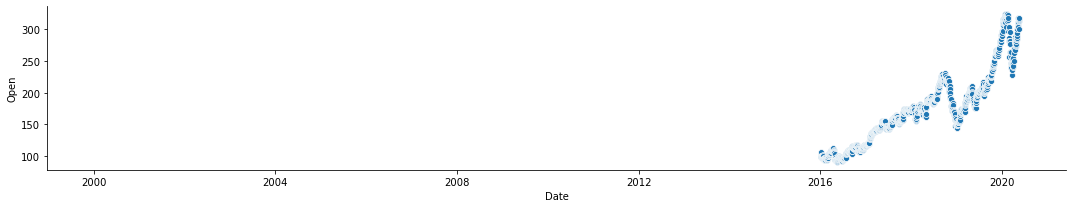

In [71]:
sns.relplot(x="Date", y="Open", data = aaplData, aspect=5, height=3)

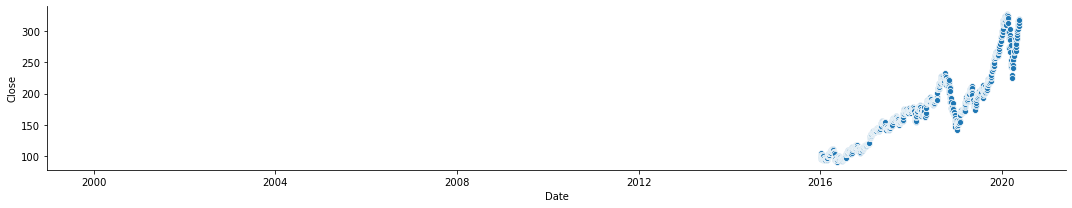

In [72]:
sns.relplot(x="Date", y="Close", data = aaplData, aspect=5, height=3)

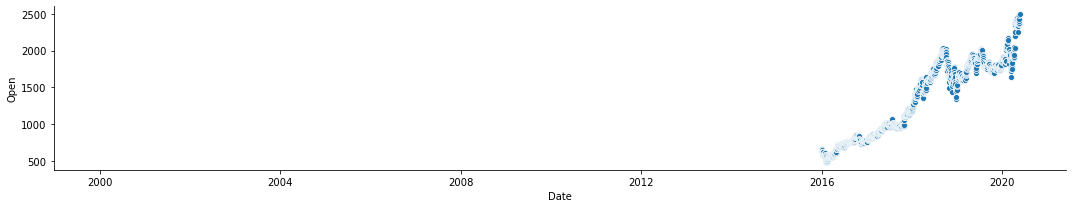

In [73]:
sns.relplot(x="Date", y="Open", data = amazonData, aspect=5, height=3)

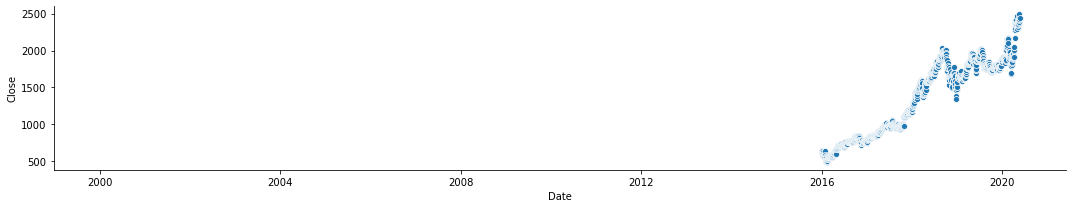

In [74]:
sns.relplot(x="Date", y="Close", data = amazonData, aspect=5, height=3)

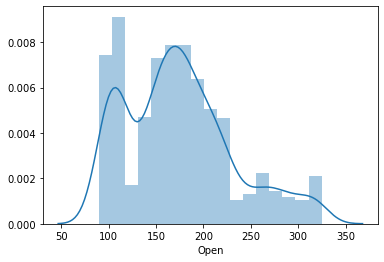

In [76]:
sns.distplot(aaplData.Open)

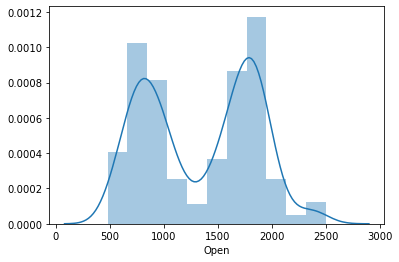

In [77]:
sns.distplot(amazonData.Open)

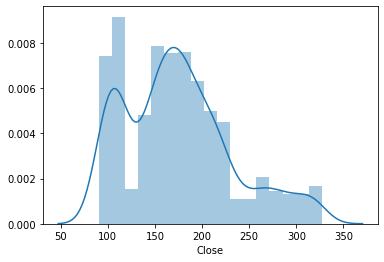

In [78]:
sns.distplot(aaplData.Close)

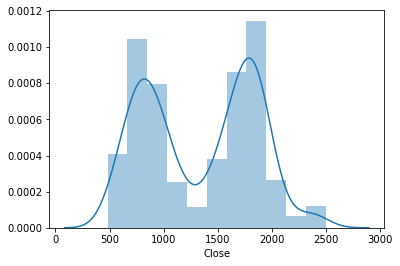

In [79]:
sns.distplot(amazonData.Close)

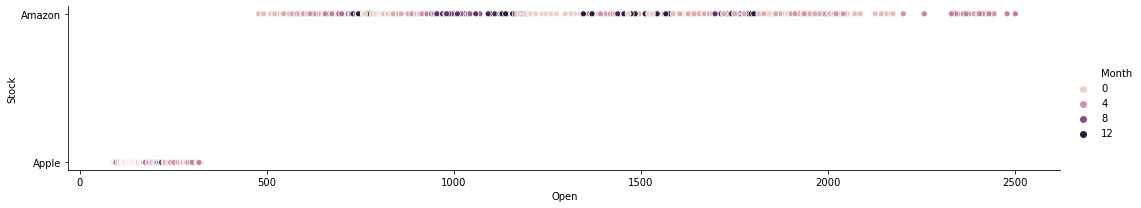

In [80]:
sns.relplot(x="Open", y="Stock", hue = "Month", data = stockData, aspect=5, height=3)

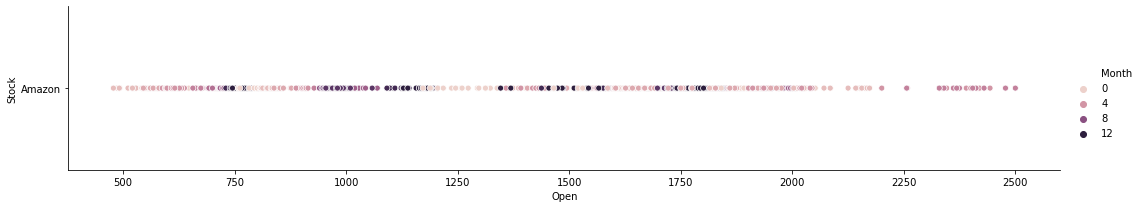

In [81]:
sns.relplot(x="Open", y="Stock", hue = "Month", data = amazonData, aspect=5, height=3)

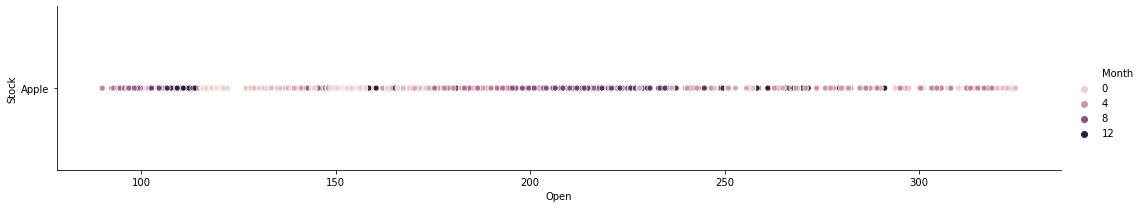

In [82]:
sns.relplot(x="Open", y="Stock", hue = "Month", data = aaplData, aspect=5, height=3)

# Section 6: Generate valuable insights

**Insight 1:** <br>
The first thing which is notable from the charts is that both stocks show an increase over the period being looked at (2016-2020) This result was expected as both companies have shown continuing growth over this period in terms of market share <br><br>
**Insight 2:** <br>
We can also see from the charts that both stock's opening and closing prices are almost identical over the period. Again this is an expected result. The growth seen in the stock prices is over a period of years, whereas the opening and closing values for each day would be expected to remain very similar with relatively minor daily rises and falls. <br><br>
**Insight 3:** <br>
When examining the opening and closing values of the stock prices over time, we can see that despite the vast differences in the range of stock prices for each company (Apple 90-327, Amazon 478-2500), the graphs share very similar trends over the period.<br>
As both companies operate within the same sector, we would expect that they would be affected similarly by external market factors and show similar trends in stock price changes <br>
This can be seen in the severe fall in both stock prices shown around the start of 2020. This fall coincides with the start of the Covid-19 pandemic. Similarly both companies have shown significant growth since this period.<br><br>
**Insight 4:** <br>
When plotting the opening stock prices for both companies and using the Month as hue we can see some interesting data.<br>
The Apple opening stock price shows a good mix with low and high opening stock prices occurring during all months <br>
The Amazon stock price however shows an interesting trend with the majority of it's highest opening stock prices occurring during the start-middle months of the year with almost no opening values over approx. 1800 occurring in the final months of the year.

## Step 19:
**Export datasets:** <br>
The code below is used to save the datasets we have created to new .csv files within the project folder <br>
These can then be used separately outside of python and uploaded to the github repository

In [83]:
aaplData.to_csv('AppleStock.csv', index = False)

In [84]:
amazonData.to_csv('AmazonStock.csv', index = False)

In [85]:
stockData.to_csv('CombinedStock.csv', index = False)